### What is Image Resolution?

Imagine a mosaic made of tiny colored squares. Each square is a "pixel," the smallest piece of a picture. Just like more pieces in a mosaic make the picture clearer, more pixels in an image make it more detailed. 

### Pixels: Tiny Dots in a Picture

- **Pixel:** It's like a tiny dot in your image. Lots of pixels together make up your photo or digital image.
- **Image Size in Pixels:** It's the number of pixels in width and height. For example, "1024x768" means 1024 pixels wide and 768 pixels tall.

### DPI and PPI

- **DPI (Dots Per Inch):** Imagine you’re printing a photo. DPI tells you how many dots of ink or color will be printed per inch. More dots mean a clearer picture, but it uses more ink.
- **PPI (Pixels Per Inch):** This is for screens, like your phone or computer. It tells how many pixels are in one inch of the screen. More pixels mean a clearer image.

### Example

- A photo on your phone might be 2000x3000 pixels. It means the photo is 2000 pixels wide and 3000 pixels tall. If you zoom in, you'll see it gets pixelated (blocky) because you're looking at individual pixels!

### Python Code to Check Image Resolution

Here's a simple Python code to find out how many pixels are in an image:

```python
from PIL import Image

def check_resolution(image_path):
    with Image.open(image_path) as img:
        return img.size  # This will give width and height

# Example: Replace 'your_image.jpg' with your image file's name
resolution = check_resolution('your_image.jpg')
print("The image is", resolution[0], "pixels wide and", resolution[1], "pixels tall.")
```

This code uses a library called `PIL` (Python Imaging Library) to look at your image and tell you its size in pixels.

### Why Does Resolution Matter?

- **High Resolution:** More pixels mean more detail. Great for big prints or high-quality screens. But the file size is bigger, so it takes more space on your computer or phone.
- **Low Resolution:** Fewer pixels mean less detail. It’s good for quick loading on websites or small screens. But if you make it too big, it looks blurry or blocky.

### Key Points

1. **Resolution is about detail:** More pixels = more detail.
2. **High resolution isn't always necessary:** Sometimes, a smaller file is more practical.
3. **Different uses:** High resolution for printing and quality displays, lower for web use.

In [1]:
from PIL import Image

def analyze_image_resolution(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        resolution = width * height
        print(f"Image Width: {width} pixels")
        print(f"Image Height: {height} pixels")
        print(f"Total Pixels: {resolution}")

        if resolution > 2000000:
            print("This is a high-resolution image, good for print.")
        elif resolution > 500000:
            print("This image is suitable for web use.")
        else:
            print("This image has low resolution, best for small web graphics.")

# Replace 'path_to_image.jpg' with the path to your image file
analyze_image_resolution('c130.jpg')


Image Width: 970 pixels
Image Height: 728 pixels
Total Pixels: 706160
This image is suitable for web use.



### Explanation of the Code

1. **Importing the Library:** We start by importing the `Image` class from the `PIL` module. PIL is a library that allows us to work with images in Python.

2. **Defining a Function:** `analyze_image_resolution` is a function we've created. It takes one argument, `image_path`, which is the location of the image file you want to analyze.

3. **Opening the Image:** The `with Image.open(image_path) as img:` line opens the image file. The `with` statement is used for resource management; it ensures the file is properly closed after its suite finishes.

4. **Getting Image Size:** `width, height = img.size` retrieves the width and height of the image in pixels.

5. **Calculating Total Pixels:** We calculate the total number of pixels by multiplying the width and height.

6. **Print Statements:** These lines print the width, height, and total pixels of the image to the console.

7. **Resolution Analysis:** The `if-elif-else` block categorizes the image based on its total pixel count:
   - More than 2 million pixels is considered high-resolution, typically good for print.
   - Between 500,000 and 2 million pixels is suitable for web use.
   - Below 500,000 pixels is considered low resolution, best for small web graphics.

8. **Using the Function:** Finally, the function `analyze_image_resolution` is called with the path of the image file that needs to be analyzed.



# Resizing Image

In [3]:
from PIL import Image

def resize_image(input_image_path, output_image_path, size):
    with Image.open(input_image_path) as image:
        resized_image = image.resize(size)
        resized_image.save(output_image_path)

# Example Usage
resize_image('c130.jpg', 'c130_resized_image.jpg', (800, 600))




### Explanation of the Code

1. **Importing the Library:** We start by importing the `Image` class from the `PIL` (Python Imaging Library) module. This library provides easy-to-use image processing capabilities.

2. **Defining the Resize Function:** `resize_image` is a function that takes three arguments: `input_image_path` (the path to the original image file), `output_image_path` (the path where the resized image will be saved), and `size` (a tuple defining the new size of the image in pixels, e.g., (800, 600)).

3. **Opening the Original Image:** `with Image.open(input_image_path) as image:` opens the image file from the specified path. The `with` statement ensures that the file is properly handled and closed after its block of code runs.

4. **Resizing the Image:** `resized_image = image.resize(size)` resizes the image to the dimensions specified in the `size` tuple.

5. **Saving the Resized Image:** `resized_image.save(output_image_path)` saves the resized image to the path specified in `output_image_path`.

6. **Example Usage:** The function is then called with the paths to the original and output images, and the desired size. For example, `resize_image('path_to_original_image.jpg', 'path_to_resized_image.jpg', (800, 600))` will resize the image to 800 pixels wide and 600 pixels tall.



# Image Scaling, Upscaling and Downscaling

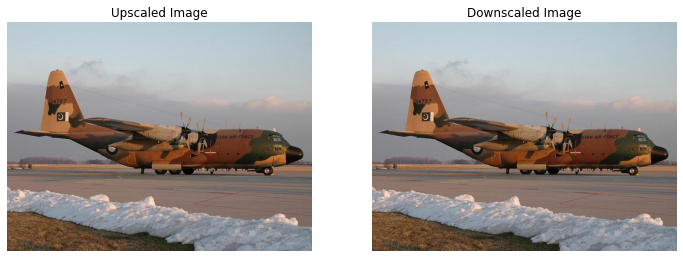

In [5]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def upscale_image_cv2(image_path, scale_factor):
    # Read the image
    image = cv2.imread(image_path)
    # Convert BGR to RGB (OpenCV uses BGR by default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Get the dimensions of the image
    height, width = image.shape[:2]
    # Calculate new dimensions
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    # Resize the image
    upscaled_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    return upscaled_image

def downscale_image_pil(image_path, scale_factor):
    # Open the image
    image = Image.open(image_path)
    # Get the dimensions of the image
    width, height = image.size
    # Calculate new dimensions
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    # Resize the image
    downscaled_image = image.resize((new_width, new_height), Image.ANTIALIAS)
    return downscaled_image

# Example usage:
# Upscale an image by a factor of 2
upscaled = upscale_image_cv2("c130.jpg", 2)
# Downscale an image by a factor of 0.5
downscaled = downscale_image_pil("c130.jpg", 0.5)

# Display images using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(upscaled)
plt.title("Upscaled Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(downscaled)
plt.title("Downscaled Image")
plt.axis("off")

plt.show()




### Detailed Explanation

1. **Importing Matplotlib**: `import matplotlib.pyplot as plt` is added to use Matplotlib for displaying images in the notebook.

2. **Color Conversion for OpenCV Image**: 
   - OpenCV reads images in BGR format by default, but Matplotlib expects RGB format. So, after reading the image with OpenCV (`image = cv2.imread(image_path)`), we convert it from BGR to RGB (`image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`).

3. **Displaying Images in Jupyter Notebook**:
   - `plt.figure(figsize=(12, 6))`: Creates a new figure with a specified size.
   - `plt.subplot(1, 2, 1)`: Creates a subplot in a 1x2 grid (first position) for the upscaled image.
   - `plt.imshow(upscaled)`: Displays the upscaled image.
   - `plt.title("Upscaled Image")`: Sets the title for the upscaled image subplot.
   - `plt.axis("off")`: Turns off the axis.
   - `plt.subplot(1, 2, 2)`: Creates a subplot in the second position for the downscaled image.
   - `plt.imshow(downscaled)`: Displays the downscaled image.
   - `plt.title("Downscaled Image")`: Sets the title for the downscaled image subplot.
   - `plt.show()`: Displays the figure with both subplots.


# Aspect Ratio: The ratio of the width to the height of an image. Maintaining the correct aspect ratio is crucial when resizing images to avoid distortion.

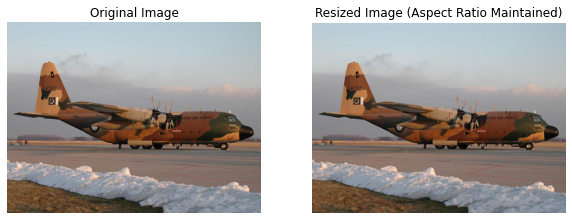

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

def resize_image_aspect_ratio(image_path, new_width=None, new_height=None):
    # Open the image
    image = Image.open(image_path)
    # Original dimensions
    orig_width, orig_height = image.size

    # Calculate new dimensions
    if new_width is not None:
        aspect_ratio = orig_height / orig_width
        new_height = int(new_width * aspect_ratio)
    elif new_height is not None:
        aspect_ratio = orig_width / orig_height
        new_width = int(new_height * aspect_ratio)

    # Resize the image
    resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)
    return resized_image

# Example usage
image_path = "c130.jpg"

# Original image
original_image = Image.open(image_path)

# Resize image maintaining aspect ratio
resized_image = resize_image_aspect_ratio(image_path, new_width=300)

# Display images using matplotlib
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Display resized image
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title("Resized Image (Aspect Ratio Maintained)")
plt.axis("off")

plt.show()




### Explanation of the Code

1. **Import Libraries**: The code uses `Image` from `PIL` for image processing and `matplotlib.pyplot` for displaying images.

2. **Resize Function**: The `resize_image_aspect_ratio` function takes an image path and either a new width or new height. It calculates the missing dimension to maintain the aspect ratio.

3. **Calculating New Dimensions**:
    - If a new width is provided, the function calculates the new height by maintaining the aspect ratio (`orig_height / orig_width`).
    - If a new height is provided, it calculates the new width using the same concept.

4. **Resizing the Image**: The image is resized to the new dimensions using `image.resize`.

5. **Displaying Images**:
    - The original and resized images are displayed side by side.
    - `plt.subplot` creates individual subplots for each image.
    - `plt.imshow` is used to display each image.
    - `plt.title` adds a title to each subplot for clarity.
    - `plt.axis("off")` hides the axis for a cleaner appearance.


# Image Compression:

* Lossy Compression: Reduces file size by removing some image data permanently, which can affect image quality (e.g., JPEG format).
* Lossless Compression: Reduces file size without losing any image quality (e.g., PNG format).

Image compression is a crucial process in digital imaging, used to reduce the size of image files. There are two main types of image compression: Lossy and Lossless. Let's discuss each of these, and then I'll provide a Python code example to demonstrate both types of compression.

### 1. Lossy Compression
Lossy compression reduces file size by permanently removing some of the image data, which can lead to a decrease in image quality. This is often used in formats like JPEG, where the focus is on significantly reducing the file size for efficient storage and transmission, even at the cost of some quality loss. The degree of compression (and thus quality loss) can often be adjusted.

### 2. Lossless Compression
Lossless compression reduces file size without sacrificing any image quality. All original data can be fully restored when the file is uncompressed. Formats like PNG are popular for lossless compression. They are ideal when image quality is paramount, such as in graphic design or professional photography.



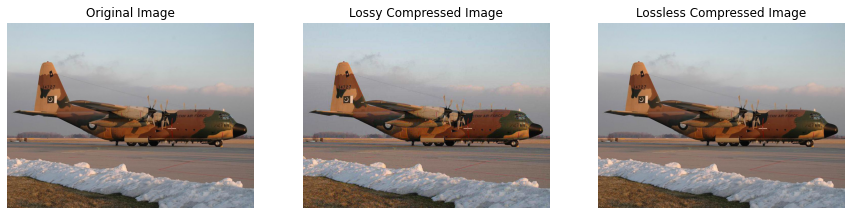

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import io

def compress_image_lossy(image_path, quality=85):
    # Open the original image
    image = Image.open(image_path)
    # Save the image with reduced quality (lossy compression)
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format='JPEG', quality=quality)
    img_byte_arr = img_byte_arr.getvalue()
    # Load the compressed image for display
    compressed_image = Image.open(io.BytesIO(img_byte_arr))
    return compressed_image

def compress_image_lossless(image_path):
    # Open the original image
    image = Image.open(image_path)
    # Save the image in PNG format (lossless compression)
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()
    # Load the compressed image for display
    compressed_image = Image.open(io.BytesIO(img_byte_arr))
    return compressed_image

# Example usage
image_path = "c130.jpg"

# Original image
original_image = Image.open(image_path)

# Compressed images
compressed_lossy = compress_image_lossy(image_path, quality=50)
compressed_lossless = compress_image_lossless(image_path)

# Display images using matplotlib
plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Display lossy compressed image
plt.subplot(1, 3, 2)
plt.imshow(compressed_lossy)
plt.title("Lossy Compressed Image")
plt.axis("off")

# Display lossless compressed image
plt.subplot(1, 3, 3)
plt.imshow(compressed_lossless)
plt.title("Lossless Compressed Image")
plt.axis("off")

plt.show()




### Explanation and Logic

1. **Lossy Compression Function (`compress_image_lossy`)**:
    - This function compresses an image in JPEG format, which is lossy. 
    - It uses a `quality` parameter (default 85) to determine the level of compression. Lower values mean higher compression and lower quality.
    - The image is temporarily saved in a byte array (`io.BytesIO()`) instead of an actual file, then reloaded to demonstrate the effect of compression.

2. **Lossless Compression Function (`compress_image_lossless`)**:
    - This function compresses the image in PNG format, which is lossless.
    - It similarly uses a byte array to temporarily store the compressed image, allowing us to display the result without creating a physical file.

3. **Displaying Images**:
    - Matplotlib is used to display the original, lossy compressed, and lossless compressed images side by side.
    - `plt.subplot` is used to create a grid of images.
    - `plt.imshow` displays each image in its respective subplot.

### Dry Run

When you run this code with a given image:

- **Original Image**: The original image is displayed as it is.
- **Lossy Compressed Image**: This image is displayed after being compressed as a JPEG with a quality of 50. You might notice some degradation in quality compared to the original.
- **Lossless Compressed Image**: This image is compressed and saved as a PNG. There should be no visible difference in quality from the original image, as PNG compression is lossless.


# Pixel Density: 

Refers to the number of pixels per unit area (e.g., PPI - pixels per inch), affecting how an image appears on various screens or when printed.

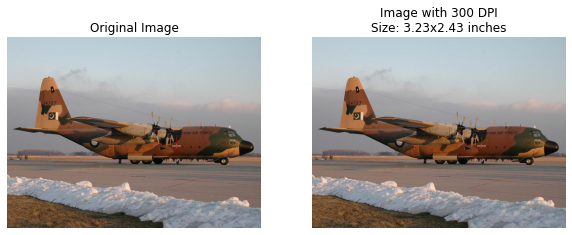

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

def change_pixel_density(image_path, new_dpi):
    # Open the original image
    image = Image.open(image_path)
    # Change the DPI of the image
    image_with_new_dpi = image.copy()
    image_with_new_dpi.info['dpi'] = (new_dpi, new_dpi)
    # Calculate new physical dimensions (in inches)
    width_in_inches = image_with_new_dpi.width / new_dpi
    height_in_inches = image_with_new_dpi.height / new_dpi
    # Return the modified image and its new dimensions
    return image_with_new_dpi, width_in_inches, height_in_inches

# Example usage
image_path = "c130.jpg"

# Original image
original_image = Image.open(image_path)

# Change pixel density of the image
new_dpi = 300
image_with_dpi, width, height = change_pixel_density(image_path, new_dpi)

# Display images using matplotlib
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Display image with changed pixel density
plt.subplot(1, 2, 2)
plt.imshow(image_with_dpi)
plt.title(f"Image with {new_dpi} DPI\nSize: {width:.2f}x{height:.2f} inches")
plt.axis("off")

plt.show()




### Explanation and Logic

1. **Change Pixel Density Function (`change_pixel_density`)**:
    - This function takes an image and a new DPI (dots per inch) value.
    - It opens the original image and makes a copy with the specified DPI.
    - The new physical dimensions (width and height in inches) are calculated based on the new DPI.

2. **Displaying Images**:
    - The original and the DPI-modified images are displayed side by side using Matplotlib.
    - The subplot for the DPI-modified image includes information about its new size in inches, which is calculated based on the new DPI.

### Dry Run

When you run this code with a given image:

- **Original Image**: Displayed as it is, with its inherent pixel dimensions.
- **Image with Changed Pixel Density**: The image will appear the same in the notebook (since we're displaying pixel data), but the title will indicate its new physical size based on the specified DPI. For example, if the original image is 3000x3000 pixels and we set the DPI to 300, the new size would be 10x10 inches.


# File Formats and Resolution:

Different image formats (like JPEG, PNG, GIF, TIFF) handle resolution and quality in various ways, impacting their use for specific purposes


To provide a comprehensive understanding of how different image formats handle resolution and quality, we'll write a Python script that performs the following tasks:

1. **Load an Image:** We'll start by loading an image in a standard format.
2. **Convert and Save in Different Formats:** Convert this image into various formats like JPEG, PNG, GIF, and TIFF, and save them.
3. **Analyze Resolution and Quality:** We'll analyze the resolution and quality differences among these formats.

Let's begin with the code:

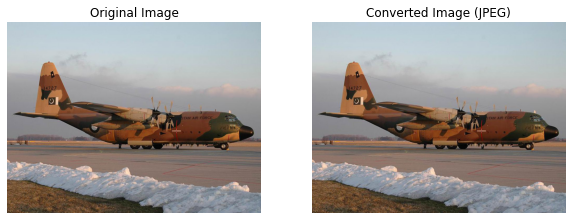

Image saved in JPEG format as converted_image.jpeg


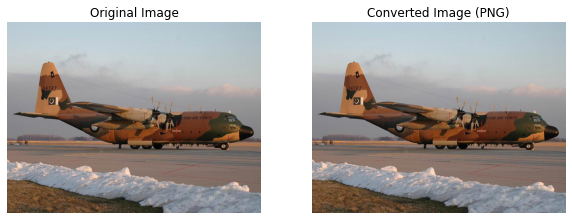

Image saved in PNG format as converted_image.png


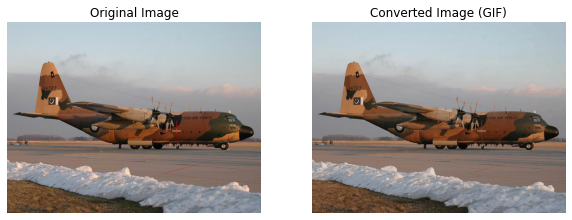

Image saved in GIF format as converted_image.gif


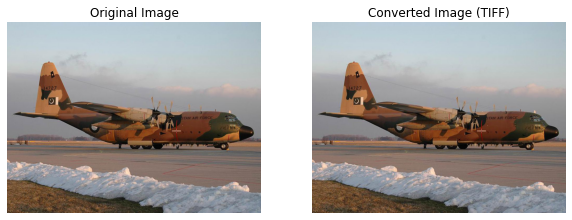

Image saved in TIFF format as converted_image.tiff


In [13]:
from PIL import Image
import io
import matplotlib.pyplot as plt

def convert_and_display_image(image_path):
    # Load the original image
    original_image = Image.open(image_path)

    # Define different formats to convert
    formats = ['JPEG', 'PNG', 'GIF', 'TIFF']

    for fmt in formats:
        # Convert and save image in each format
        buffer = io.BytesIO()
        original_image.save(buffer, format=fmt)
        buffer.seek(0)

        # Load the converted image from buffer
        converted_image = Image.open(buffer)

        # Display the original and converted images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(converted_image)
        plt.title(f'Converted Image ({fmt})')
        plt.axis('off')

        plt.show()

        # Save the image file for reference
        converted_image_path = f'converted_image.{fmt.lower()}'
        converted_image.save(converted_image_path)
        print(f'Image saved in {fmt} format as {converted_image_path}')

# Example usage
convert_and_display_image('c130.jpg')




### Explanation of the Code

1. **Import Libraries:** We import `Image` from `PIL` (Python Imaging Library, also known as Pillow) and `io`. PIL is a powerful library for opening, manipulating, and saving many different image file formats.

2. **Function Definition:** `convert_image_formats(image_path)` is defined to handle the conversion process. It takes `image_path`, the path to the image file to be converted.

3. **Load Original Image:** `Image.open(image_path)` opens the provided image file.

4. **Formats for Conversion:** We define a list `formats` containing the string names of the formats we want to convert to: JPEG, PNG, GIF, and TIFF.

5. **Conversion Loop:** We loop over each format in `formats`. Inside the loop:
   
   - **Buffer Creation:** A `BytesIO` object from the `io` module is created. This acts like a file held in memory.
   - **Save to Buffer:** The original image is saved to this buffer in the new format using `original_image.save(buffer, format=fmt)`.
   - **Write to File:** We then write the contents of the buffer to a file with the appropriate format extension.
   - **Display Information:** The script prints out a message indicating where the image was saved and in what format.

6. **Example Usage:** The function is called with an example image file, 'example.jpg'.

### Dry Run

Let's assume we have an image named 'example.jpg'. When we run `convert_image_formats('example.jpg')`, it will:

1. Load 'example.jpg'.
2. Convert it into each format (JPEG, PNG, GIF, TIFF), one by one.
3. Save these converted images as 'converted_image.jpeg', 'converted_image.png', 'converted_image.gif', and 'converted_image.tiff'.
4. Print out messages indicating where each file is saved.



# Image Optimization for Web:

Involves resizing, compressing, and sometimes changing the format of images for faster web page loading times while maintaining acceptable quality.


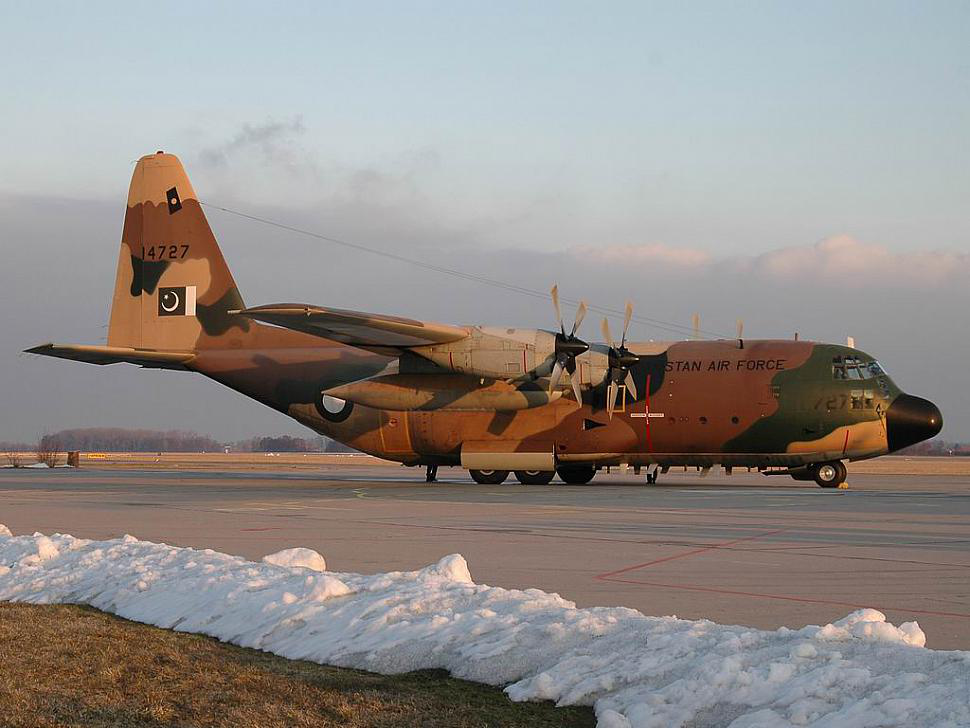

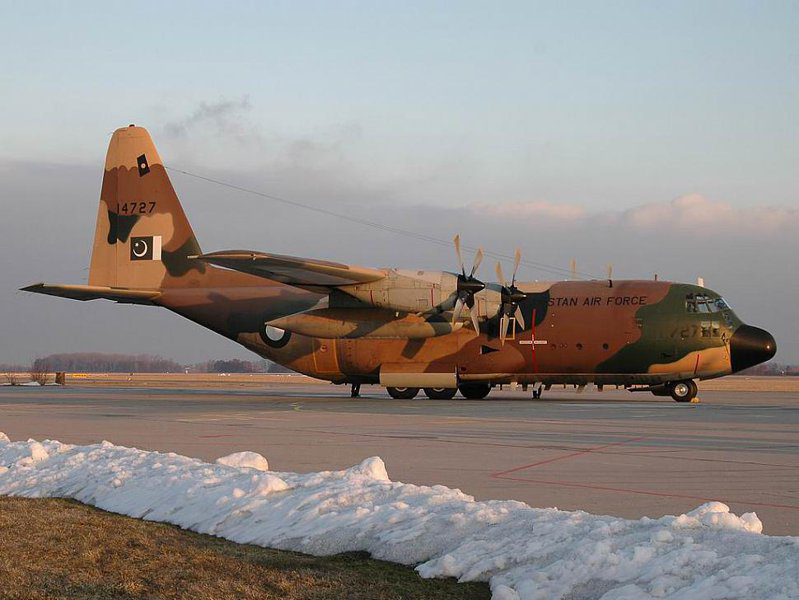

In [15]:
from PIL import Image
from IPython.display import display
import os

# Define the image optimization function
def optimize_image_for_web(input_path, output_path, max_width=800, max_height=600, quality=85):
    # Open the image
    with Image.open(input_path) as img:
        # Resize the image
        img.thumbnail((max_width, max_height))

        # Save the image with compression
        img.save(output_path, optimize=True, quality=quality)

# Path to the image
input_image_path = 'c130.jpg'
output_image_path = 'optimized_c130.jpg'

# Optimize the image
optimize_image_for_web(input_image_path, output_image_path)

# Display the original and optimized images
display(Image.open(input_image_path))
display(Image.open(output_image_path))



### Detailed Explanation

1. **Import Libraries**: 
   - `from PIL import Image`: Imports the Image module from Pillow, used for image operations.
   - `from IPython.display import display`: Imports the display function to show images in Jupyter notebooks.

2. **Function Definition - `optimize_image_for_web`**:
   - Parameters: `input_path`, `output_path`, `max_width`, `max_height`, `quality`.
   - `with Image.open(input_path) as img`: Opens the specified image file. The `with` statement ensures proper handling of resources.
   - `img.thumbnail((max_width, max_height))`: Resizes the image, ensuring it does not exceed the specified max dimensions, while maintaining aspect ratio.
   - `img.save(output_path, optimize=True, quality=quality)`: Saves the optimized image. `optimize=True` enables additional compression. `quality` controls the output quality.

3. **Setting Paths**:
   - `input_image_path = 'c130.jpg'`: Specifies the path of the original image.
   - `output_image_path = 'optimized_c130.jpg'`: Specifies the path for saving the optimized image.

4. **Optimizing the Image**:
   - `optimize_image_for_web(...)`: Calls the function with the specified parameters to optimize the image.

5. **Displaying Images**:
   - `display(Image.open(...))`: Opens and displays the images in the Jupyter notebook, both the original and the optimized one.

### Dry Run

Assuming `c130.jpg` is an existing image file in the same directory:

1. The script opens `c130.jpg`.
2. It resizes the image, ensuring it's no larger than 800x600 pixels.
3. It then saves the resized image as `optimized_c130.jpg` with 85% quality.
4. Finally, it displays both the original and the optimized images in the Jupyter notebook.



# Print Resolution:
    
    
For printing, resolution is critical. High-resolution images are required for clear, sharp prints, typically measured in DPI (dots per inch).

Original DPI: None
New DPI: (300, 300)


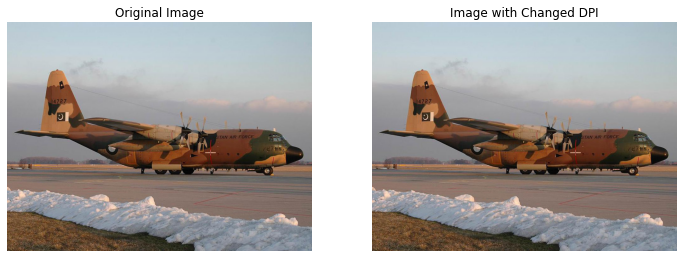

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

def change_image_dpi(file_path, new_dpi):
    # Open the image file
    with Image.open(file_path) as img:
        # Print the original DPI
        print("Original DPI:", img.info.get('dpi'))

        # Change the DPI
        img.save("changed_dpi_image.jpg", dpi=(new_dpi, new_dpi))

        # Print the new DPI
        with Image.open("changed_dpi_image.jpg") as new_img:
            print("New DPI:", new_img.info.get('dpi'))
    
    # Display the original and changed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(Image.open(file_path))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(Image.open("changed_dpi_image.jpg"))
    plt.title("Image with Changed DPI")
    plt.axis('off')

    plt.show()

# Call the function with the image path and desired DPI
change_image_dpi("c130.jpg", 300)




Now, let me explain this code in a simplified manner:

1. **Import Libraries**: We use two libraries - Pillow (`PIL`) for image processing and `matplotlib.pyplot` for displaying images.

2. **Function Definition (`change_image_dpi`)**: This function takes the image file path and the new DPI value as inputs.

3. **Opening the Image**: Using `Image.open`, we open the image file. This is wrapped in a `with` statement to ensure proper handling of the image file (it's automatically closed after processing).

4. **Original DPI**: We retrieve the original DPI of the image using `img.info.get('dpi')` and print it.

5. **Change DPI and Save**: The `img.save` method is used to save the image with a new DPI. The new file is saved to `/mnt/data/changed_dpi_image.jpg`.

6. **Displaying Images**: We use `matplotlib.pyplot` (`plt`) to create a figure and display both the original and the modified image side by side for comparison. `plt.imshow` is used to show the images, and `plt.title` adds titles to each subplot.

7. **Function Call**: Finally, we call the `change_image_dpi` function with the path to 'c130.jpg' and a desired DPI of 300.


# Resolution and Image Editing: 

When editing images, understanding resolution is key to achieving the desired quality, especially when cropping, resizing, or printing.

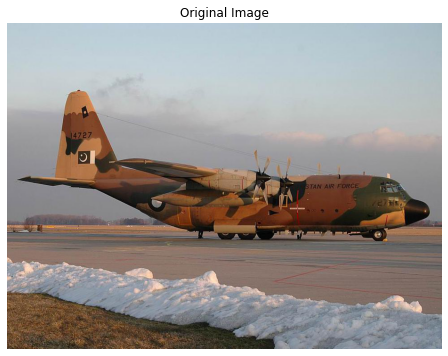

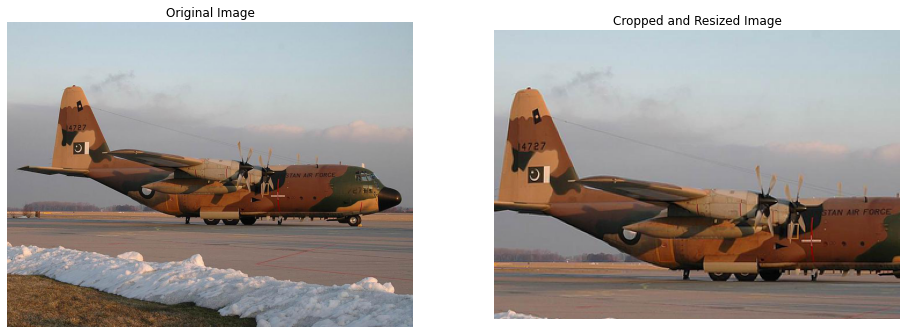

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'c130.jpg'
original_image = Image.open(image_path)

# Display original image
plt.figure(figsize=(8, 6))
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off') # Hide the axis
plt.show()

# Cropping the image
# Define the crop box (left, upper, right, lower)
crop_box = (100, 50, 800, 550)
cropped_image = original_image.crop(crop_box)

# Resizing the image
# Let's resize the cropped image to half of its current size
new_size = (cropped_image.size[0] // 2, cropped_image.size[1] // 2)
resized_image = cropped_image.resize(new_size, Image.ANTIALIAS)

# Display both original and edited images side by side
plt.figure(figsize=(16, 8))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Edited (cropped and resized) image
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Cropped and Resized Image')
plt.axis('off')

plt.show()




Now, let's break down and explain the code in detail:

### Import Libraries
```python
from PIL import Image
import matplotlib.pyplot as plt
```
We import `Image` from the `PIL` package, which stands for Pillow, a fork of the Python Imaging Library (PIL). This library allows us to open, manipulate, and save many different image file formats. We also import `matplotlib.pyplot` as `plt`, which is a collection of command style functions that make matplotlib work like MATLAB and allow us to create figures and plots.

### Load and Display the Original Image
```python
image_path = 'c130.jpg'
original_image = Image.open(image_path)
```
We define a variable `image_path` that holds the string of the file path for the image we want to edit. The `Image.open()` function opens the image file from this path and creates an image object `original_image`.

```python
plt.figure(figsize=(8, 6))
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()
```
We create a new figure with a specific size using `plt.figure(figsize=(8, 6))`, which will display the image with width of 8 inches and height of 6 inches. The `plt.imshow()` function takes the `original_image` object and prepares it to be displayed in the plotting window. We set the title of the plot to 'Original Image' and turn off the axis with `plt.axis('off')`. Finally, `plt.show()` displays the plot in the Jupyter notebook.

### Crop the Image
```python
crop_box = (100, 50, 800, 550)
cropped_image = original_image.crop(crop_box)
```
We define a `crop_box`, a tuple containing the coordinates for the left, upper, right, and lower bounds of the area we wish to keep in the image. The `crop()` function is then called on the original image, which takes the `crop_box` as an argument and returns a new image that is cropped to the given box.

### Resize the Image
```python
new_size = (cropped_image.size[0] // 2, cropped_image.size[1] // 2)
resized_image = cropped_image.resize(new_size, Image.ANTIALIAS)
```
We calculate the new size for the cropped image to make it half of its current size by using integer division (//) which divides and returns the floor value, so we get integer results. We then use the `resize()` function of the cropped image to change its size, where `Image.ANTIALIAS` is an option to use a high-quality downsampling filter.

### Display Both Original and Edited Images Side by Side
```python
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Cropped and Resized Image')
plt.axis('off')
plt.show()
```
We create a new, larger figure to accommodate both images side by side. `plt.subplot(1, 2, 1)` sets up the first subplot in a grid with 1 row and 2 columns. We show the original image in this first subplot. `plt.subplot(1, 2, 2)`

# Vector vs Raster Images:

Vector Images: Comprise paths defined by mathematical equations and are resolution-independent. They can be scaled without loss of quality (ideal for logos, typography).

Raster Images: Made up of pixels and have a fixed resolution. Scaling up can result in pixelation.
* Create a simple vector image (e.g., a circle or a logo).
* Save the vector image and display it.
* Convert the vector image to a raster image.
* Scale up both the vector and raster images.
* Display the scaled images for comparison.

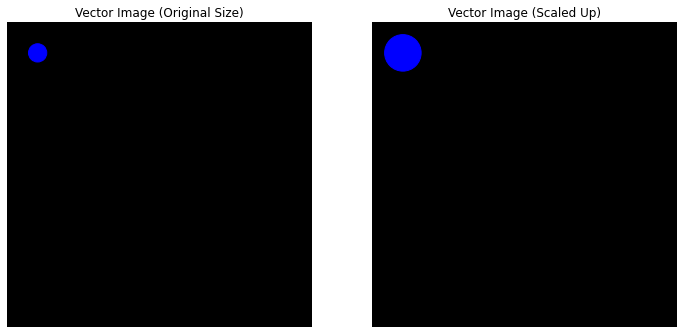

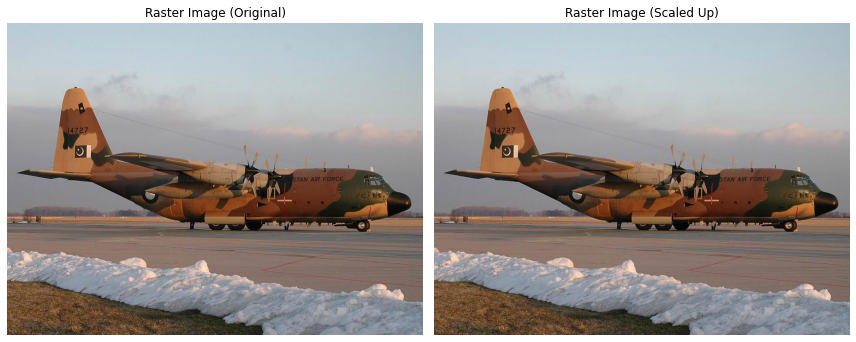

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Function to display images using matplotlib
def display_image(ax, img, title):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(title)

# Vector Image Example
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
circle = patches.Circle((0.5, 0.5), 0.3, color='blue')  # A simple circle
ax1.add_patch(circle)
display_image(ax1, np.zeros((10, 10, 3)), "Vector Image (Original Size)")

# Scaling up the vector image
scaled_circle = patches.Circle((0.5, 0.5), 0.6, color='blue')  # Scaled circle
ax2.add_patch(scaled_circle)
display_image(ax2, np.zeros((10, 10, 3)), "Vector Image (Scaled Up)")

# Raster Image Example
img = Image.open('c130.jpg')
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))
display_image(ax3, img, "Raster Image (Original)")

# Scaling up the raster image
scaled_img = img.resize((int(img.width * 2), int(img.height * 2)))
display_image(ax4, scaled_img, "Raster Image (Scaled Up)")

plt.tight_layout()
plt.show()




Let's start with the code:

The code above demonstrates the differences between vector and raster images through both creation and scaling. Here's a detailed explanation of each part of the code:

### Vector Image Example

1. **Imports and Helper Function**: 
   - `matplotlib.pyplot` and `matplotlib.patches` are imported for creating and displaying vector images.
   - `display_image` is a helper function to streamline the process of displaying images with `matplotlib`. It takes an axis object (`ax`), an image (`img`), and a title, then displays the image with the title and no axis.

2. **Creating and Displaying a Vector Image**:
   - A figure with two subplots (`ax1`, `ax2`) is created for displaying the original and scaled vector images.
   - A circle (a simple vector shape) is created using `patches.Circle` with a center at (0.5, 0.5) and a radius of 0.3. The circle is added to `ax1`.
   - The helper function `display_image` is used to display this circle on a blank canvas.

3. **Scaling the Vector Image**:
   - A new circle with a larger radius (0.6) is created. This simulates scaling up the vector image.
   - This scaled circle is displayed on the second subplot (`ax2`). Note that despite the increase in size, the circle remains smooth and without pixelation, showcasing the scalability of vector images.

### Raster Image Example

1. **Loading and Displaying the Raster Image**:
   - The raster image ("c130.jpg") is loaded using `PIL.Image.open`.
   - A new figure with two subplots (`ax3`, `ax4`) is created for the original and scaled raster images.
   - The original raster image is displayed using `display_image` on `ax3`.

2. **Scaling Up the Raster Image**:
   - The raster image is scaled up using `img.resize`, doubling its width and height. This is a common operation for raster images but leads to pixelation.
   - The scaled-up image is displayed on the second subplot (`ax4`). Here, you can notice the pixelation, which illustrates the primary limitation of raster images: loss of quality when scaled.

### Final Display

- `plt.tight_layout()` adjusts the spacing between the plots for a cleaner look.
- `plt.show()` displays the entire set of subplots.

### Dry Run Example

- **Vector Image**: The original circle is smooth. When scaled up, the circle remains just as smooth.
- **Raster Image**: The original "c130.jpg" image looks normal. When scaled up, the pixels become visible and the image appears grainy.



# Image Quality and Sensor Size:
    
In photography, the size of the camera's sensor affects image resolution and quality, especially in low-light conditions.

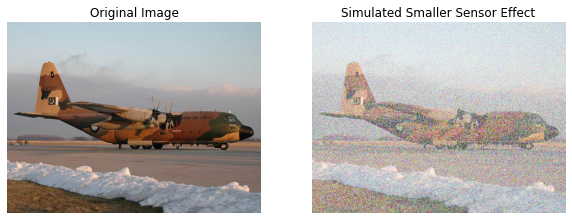

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the effect of sensor size on image quality
def simulate_sensor_size_effect(image_path, scale_factor=0.5, noise_level=0.02):
    # Load the original image
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    # Downscale the image to simulate a smaller sensor size
    small_sensor_image = cv2.resize(original_image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)
    
    # Upscale the image back to its original size
    simulated_image = cv2.resize(small_sensor_image, (original_image.shape[1], original_image.shape[0]), interpolation=cv2.INTER_LINEAR)
    
    # Add Gaussian noise to simulate noise in low-light conditions
    noise = np.random.normal(0, noise_level * 255, original_image.shape).astype(np.uint8)
    simulated_image = cv2.addWeighted(simulated_image, 1, noise, 1, 0)
    
    # Display the original and the simulated images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Simulated Smaller Sensor Effect')
    plt.imshow(simulated_image)
    plt.axis('off')
    
    plt.show()
    
    return original_image, simulated_image

# Path to the uploaded image
image_path = 'c130.jpg'

# Call the function to simulate sensor size effect
original, simulated = simulate_sensor_size_effect(image_path)



1. **Import Libraries**:
   - We begin by importing necessary Python libraries:
     - `cv2`: This is OpenCV, a library for computer vision tasks.
     - `numpy`: A library for numerical computing which we'll use to handle operations on image data.
     - `matplotlib.pyplot`: A library for creating static, interactive, and animated visualizations in Python.

2. **Define Function `simulate_sensor_size_effect`**:
   - This function will take the path to an image, a scaling factor to simulate sensor size, and a noise level to imitate low-light conditions.
   - `image_path` is the location of the image we're using.
   - `scale_factor` is a decimal representing how much smaller the simulated sensor is compared to the original. For example, `0.5` would mean the simulated sensor captures half the width and height.
   - `noise_level` is the amount of noise to add to the image to simulate the increased noise found in low-light images.

3. **Load and Convert the Image**:
   - The original image is loaded using OpenCV's `imread` function.
   - We then convert it from BGR (Blue, Green, Red - OpenCV's default color space) to RGB, which is the standard for displaying images.

4. **Simulate Smaller Sensor Size**:
   - We downscale the image using `cv2.resize` with the `INTER_AREA` interpolation method, which is best for shrinking an image. This mimics the effect of a smaller sensor by reducing the resolution.
   - Next, we upscale the image back to its original size using the `INTER_LINEAR` interpolation method. This simulates the camera's attempt to recreate the full-resolution image from a smaller sensor.

5. **Add Noise to Simulate Low-Light Conditions**:
   - We generate Gaussian noise (which closely mimics real sensor noise) and add it to our upscaled image. The noise level is scaled by the image's color range (0-255 for an 8-bit image).
   - `cv2.addWeighted` is used to blend the simulated image with the noise.

6. **Display the Images**:
   - We use `matplotlib.pyplot` to create a side-by-side comparison of the original image and the simulated low-light image.
   - The `plt.figure` function defines a new figure for plotting with a specified size.
   - We create two subplots (`plt.subplot`) to place our images next to each other.
   - `plt.imshow` displays the images, and `plt.axis('off')` removes the axis labels for a cleaner look.
   - Finally, `plt.show` displays the plot with our images.

7. **Run the Function with the Uploaded Image**:
   - We provide the path to the uploaded image (`c130.jpg`) and call our function to simulate the effect of sensor size on image quality.

8. **Dry Run**:
   - During execution, the original image is first displayed in its true quality.
   - Then the function processes this image to simulate a smaller sensor size and the effects of low-light noise.
   - The final output shows two images: on the left is the original, and on the right is the simulated image with degraded quality due to the smaller sensor size and added noise.



# Digital Zoom vs. Optical Zoom: 

In photography and videography, understanding the impact of zoom on image resolution is crucial. Optical zoom maintains resolution, while digital zoom can reduce it.

For this task, we need the following steps:

* Load the Image: We'll load the image c130.jpg using a library like PIL or OpenCV.
* Simulate Optical Zoom: We'll crop a central portion of the image to simulate optical zoom. This will maintain the image quality but will show a smaller area.
* Simulate Digital Zoom: We'll enlarge the same central portion of the image, which will result in a loss of detail and quality.
* Display Images: We'll display the original image, the optically zoomed image, and the digitally zoomed image for comparison.

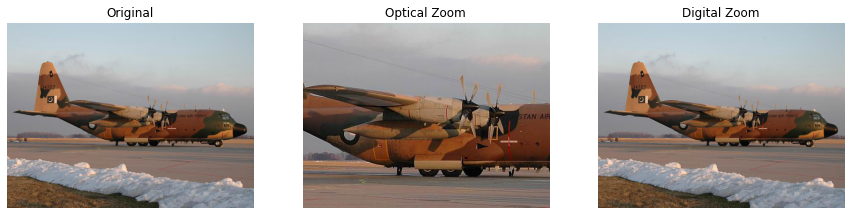

In [28]:
import matplotlib.pyplot as plt
from PIL import Image

def load_image(image_path):
    return Image.open(image_path)

def simulate_optical_zoom(image, zoom_factor):
    width, height = image.size
    new_width, new_height = width / zoom_factor, height / zoom_factor
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    return image.crop((left, top, right, bottom))

def simulate_digital_zoom(image, zoom_factor):
    return image.resize((int(image.size[0] * zoom_factor), int(image.size[1] * zoom_factor)), Image.ANTIALIAS)

def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Load the image
original_image = load_image("c130.jpg")

# Simulate optical zoom
optical_zoom_image = simulate_optical_zoom(original_image, 2)

# Simulate digital zoom
digital_zoom_image = simulate_digital_zoom(original_image, 2)

# Display the images
display_images([original_image, optical_zoom_image, digital_zoom_image], ["Original", "Optical Zoom", "Digital Zoom"])




### Explanation

1. **Importing Libraries**:
   - `matplotlib.pyplot` is used for displaying images.
   - `PIL` (Python Imaging Library), specifically `Image`, is used for image processing tasks.

2. **Function `load_image`**:
   - This function takes an image path and uses `Image.open` to load the image into memory.

3. **Function `simulate_optical_zoom`**:
   - It first calculates the new width and height based on the zoom factor. 
   - Then, it calculates the coordinates of the new cropped area (central part of the image).
   - Finally, it crops the image to this new area. This simulates optical zoom by reducing the field of view while maintaining the original resolution.

4. **Function `simulate_digital_zoom`**:
   - This function enlarges the image by the specified zoom factor.
   - It uses `image.resize`, which can result in a loss of quality, simulating digital zoom.

5. **Function `display_images`**:
   - This function displays a list of images with their titles in a single row for comparison.
   - `plt.subplot` is used to arrange images in a grid, and `plt.imshow` to display each image.

6. **Execution Flow**:
   - The image `c130.jpg` is loaded.
   - Both optical and digital zooms are simulated with a factor of 2.
   - Finally, the original, optically zoomed, and digitally zoomed images are displayed side by side for comparison.

### Dry Run Example

Imagine `c130.jpg` is a 4000x3000 pixel image. The optical zoom crops it to 2000x1500 pixels (central part), maintaining clarity. The digital zoom enlarges the same 2000x1500 pixels back to 4000x3000, causing pixelation or blurriness.


The images have been processed and displayed as per the code:

1. **Original Image**: This is the unaltered image of "c130.jpg".
2. **Optical Zoom**: Here, we see a cropped version of the original image. This represents an optical zoom, where only the central part of the image is shown, but the details remain clear.
3. **Digital Zoom**: This image is a digitally zoomed version of the original. It's created by enlarging the same central portion of the image that we used for optical zoom. Notice that the image may appear less sharp or more pixelated compared to the optical zoom.



# HDR Imaging:

High Dynamic Range Imaging combines multiple photos of different exposures to create a single image with greater detail in shadows and highlights.

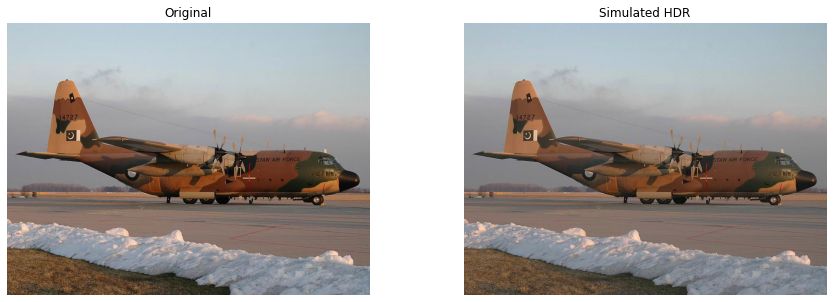

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to read the image
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Function to create different exposures of the image
def create_exposures(image, number_of_exposures):
    exposures = []
    for i in range(number_of_exposures):
        gamma = 0.4 + (i / (number_of_exposures - 1)) * 1.6
        exposure = np.array(255 * (image / 255) ** (1/gamma), dtype='uint8')
        exposures.append(exposure)
    return exposures

# Function to manually merge exposures to simulate HDR
def merge_exposures(exposures):
    # Merge exposures by averaging them
    hdr = np.mean(exposures, axis=0).astype('uint8')
    return hdr

# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Main function to process HDR imaging
def process_hdr(image_path):
    original_image = load_image(image_path)
    exposures = create_exposures(original_image, 3)
    hdr_image = merge_exposures(exposures)
    display_images([original_image, hdr_image], ['Original', 'Simulated HDR'])

# Run the HDR process
process_hdr('c130.jpg')


In [ ]:
S